In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_16348\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[2723]

Unnamed: 0                         2723.000000
EPIC ID                       201249247.000000
Teff                               4118.702000
logg                                  4.281800
Flare #                               3.000000
Observation time                     79.970138
Average flare duration                0.136212
Longest flare duration                0.183886
Shortest flare duration               0.081727
Average percentage increase          80.363905
Highest percentage increase         234.372044
Lowest percentage increase            2.955067
Name: 2723, dtype: float64

In [4]:
flc = from_mast("201249247", mode="LC", mission="K2")

8% (322/3877) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (322/3877) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

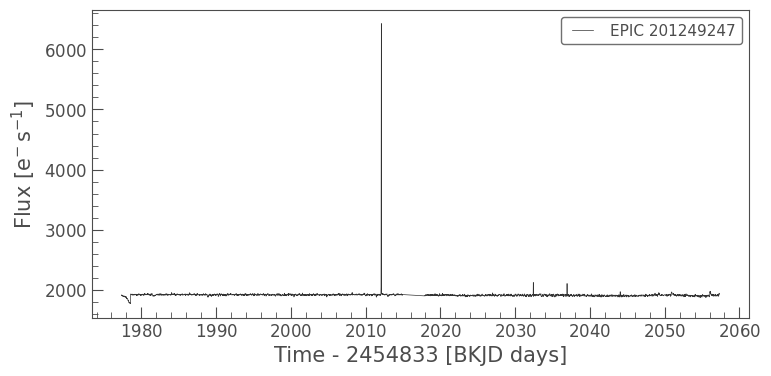

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

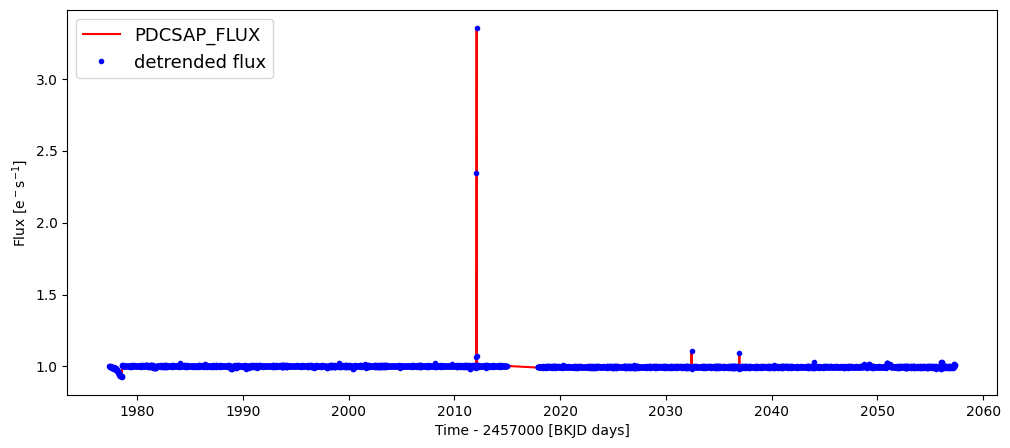

In [8]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(3011, 3011.5)
#plt.ylim(.95,1.05)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,1613,1617,93137,93141,2012.057879,2012.139606,6726.267087187014,7.416497905158626,2.3437204360961914,0.081727,3546.000000
1,3254,3263,95038,95047,2050.898569,2051.082455,341.5368960399367,14.91541242750224,0.029550671577453613,0.183886,3546.000000
2,3486,3493,95290,95297,2056.047400,2056.190423,319.4165160797619,13.416162377655146,0.03764605522155762,0.143023,3546.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 1 candidate(s) in the (0,1752) gap.
Found 2 candidate(s) in the (1752,3546) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
